In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading Completed, Rose")

Loading Completed, Rose


In [3]:
def get_data():
    file="datasets/global_food_prices.csv"
    data=pd.read_csv(file)
    food=data.copy()
    food.rename(columns={
        food.columns[0]:'Country_id',
        food.columns[1]:'Country_name', 
        food.columns[2]:'Locality_id',
        food.columns[3]:'Locality_name',
        food.columns[4]:'Market_id',
        food.columns[5]:'Market_name',
        food.columns[6]:'Commodity_purchase_id',
        food.columns[7]:'Commodity_purchased',
        food.columns[8]:'Currency_id',
        food.columns[9]:'Currency_name',
        food.columns[10]:'Market_type_id',
        food.columns[11]:'Market_type',
        food.columns[12]:'Measurement_id',
        food.columns[13]:'Unit_measurement',
        food.columns[14]:'Month',
        food.columns[15]:'Year',
        food.columns[16]:'Price',
        food.columns[17]:'Commodity_price_source'
    }, inplace=True)
    food.drop(food.columns[17], axis=1, inplace=True)
    items=[]
    for item_name in list(food.Commodity_purchased.str.split('-')):
        items.append(item_name[0])
    food.Commodity_purchased=items
    return food

In [4]:
food=get_data()

C:\Users\USER\AppData\Local\Temp\ipykernel_11432\1097734788.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(file)


In [6]:
food.head(10)

,Country_id,Country_name,Locality_id,Locality_name,Market_id,Market_name,Commodity_purchase_id,Commodity_purchased,Currency_id,Currency_name,Market_type_id,Market_type,Measurement_id,Unit_measurement,Month,Year,Price
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0
5,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,6,2014,50.0
6,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,7,2014,50.0
7,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,8,2014,50.0
8,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,9,2014,50.0
9,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,10,2014,50.0


In [7]:
food.tail()

,Country_id,Country_name,Locality_id,Locality_name,Market_id,Market_name,Commodity_purchase_id,Commodity_purchased,Currency_id,Currency_name,Market_type_id,Market_type,Measurement_id,Unit_measurement,Month,Year,Price
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar),0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000
2050637,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,887,Fish (kapenta),0.0,ZWL,15,Retail,5,KG,6,2021,1200.0000


In [9]:
## CHECKING FOR DUPLICATES
food.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2050633    False
2050634    False
2050635    False
2050636    False
2050637    False
Length: 2050638, dtype: bool

In [10]:
food.duplicated().value_counts()

False    2050638
dtype: int64

In [11]:
food['Locality_name'].isnull().values.any()

True

In [12]:
food['Locality_name'].isnull().sum()

611016

In [13]:
food['Locality_name'].fillna("None", inplace=True)

In [14]:
food['Locality_name'].isnull().values.any()

False

In [19]:
cty2=food.groupby('Country_name')

In [20]:
line_data=cty2.get_group('Afghanistan').groupby('Commodity_purchased')['Commodity_purchased'].count()

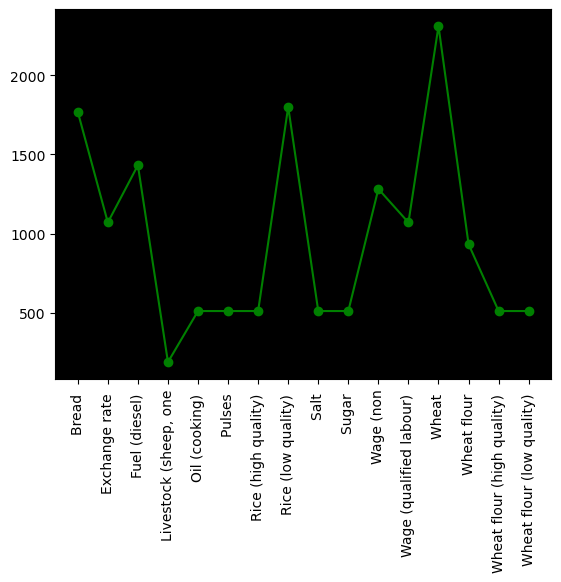

In [71]:
fig1,ax1=plt.subplots(facecolor='white')
ax1.plot(line_data.index,line_data.values,'o-',color='green')
ax1.set_facecolor(color='black')
plt.xticks(rotation=90)
plt.show()

In [30]:
region=['Country_name','Commodity_purchased']

In [62]:
food[region].value_counts().sort_values(ascending=False)

Country_name     Commodity_purchased  
Niger            Millet                   15596
Malawi           Maize                    12216
Mali             Millet                   11648
Bassas da India  Rice                     11645
Niger            Rice (imported)          10825
                                          ...  
Mozambique       Fuel (diesel)                1
                 Maize (imported)             1
Ethiopia         Wage (non                    1
                 Beans (haricot, red)         1
Mozambique       Fuel (petrol                 1
Length: 2296, dtype: int64

array([<AxesSubplot:ylabel='Countries with the highest Commodity Purchase'>],
      dtype=object)

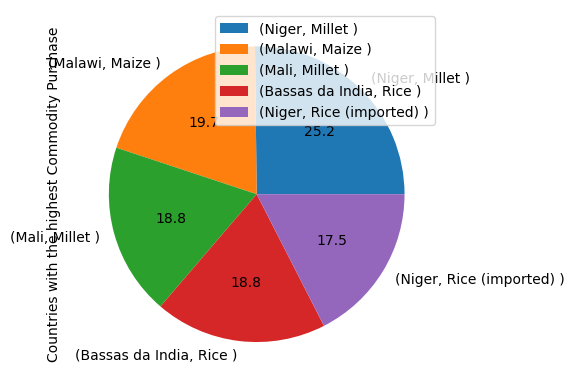

In [175]:
food[region].value_counts().sort_values(ascending=False).head(5).plot(kind='pie',autopct='%.1f',subplots=True,legend=True,ylabel='Countries with the highest Commodity Purchase')

<AxesSubplot:title={'center':'Count of each Commodity in Top 20 Countries'}, xlabel='Country_name,Commodity_purchased', ylabel='Count'>

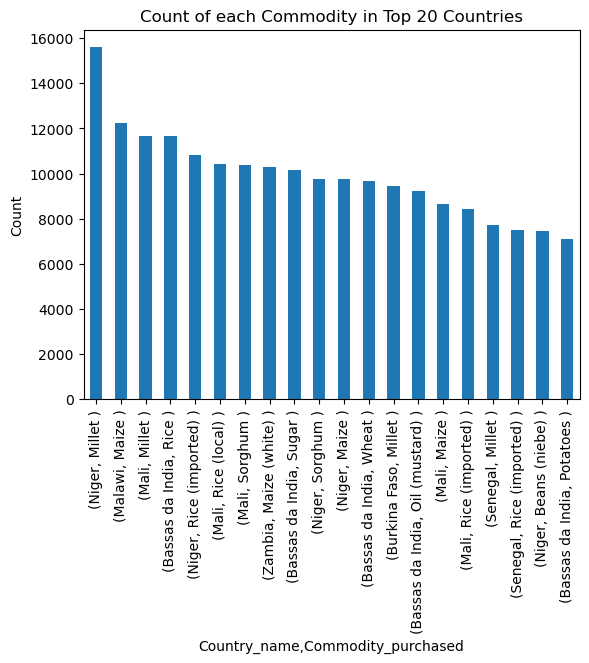

In [179]:
food[region].value_counts().head(20).plot(kind='bar',ylabel='Count',title='Count of each Commodity in Top 20 Countries')

<AxesSubplot:title={'center':'Sum of Top 20 most purchased Commodities in all Countries'}, xlabel='Commodities', ylabel='sum'>

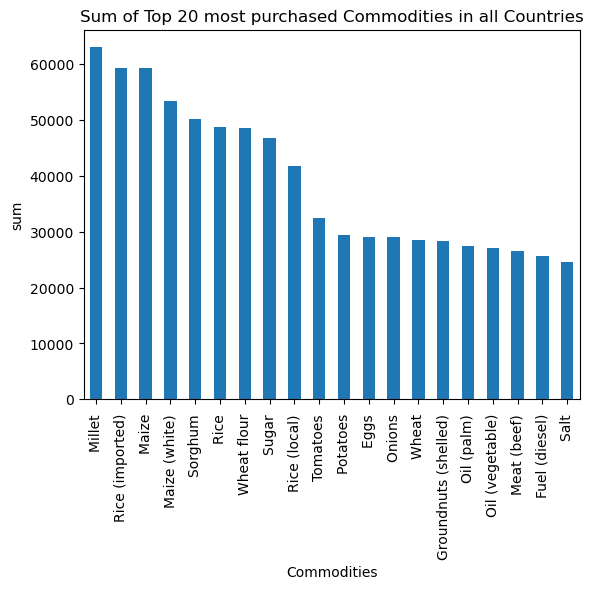

In [136]:
food[region].Commodity_purchased.value_counts().head(20).plot(kind='bar',xlabel='Commodities',ylabel='sum',title='Sum of Top 20 most purchased Commodities in all Countries')


<AxesSubplot:title={'center':'Percentage of Top 20 Commodities in all Countries'}, ylabel='sum'>

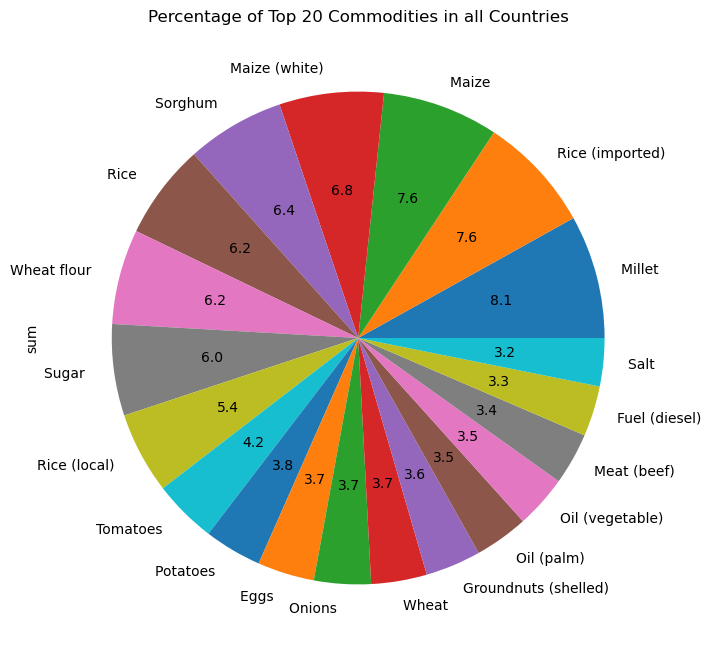

In [165]:
food[region].Commodity_purchased.value_counts().head(20).plot(kind='pie',autopct='%.1f',figsize=(14,8),xlabel='Commodities',ylabel='sum',title='Percentage of Top 20 Commodities in all Countries')


<AxesSubplot:xlabel='Country Name', ylabel='Total Commodity Purchased'>

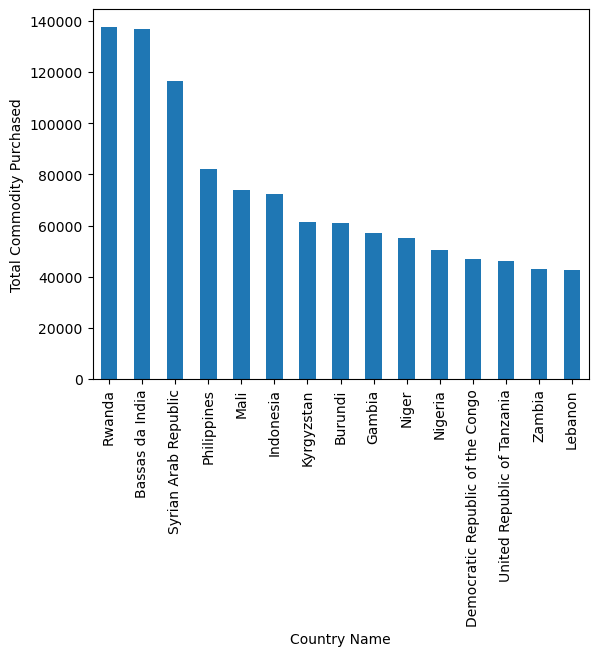

In [66]:
a=food.groupby('Country_name')['Commodity_purchased'].count().sort_values(ascending=False).head(15)
a.plot.bar(xlabel='Country Name',ylabel='Total Commodity Purchased')

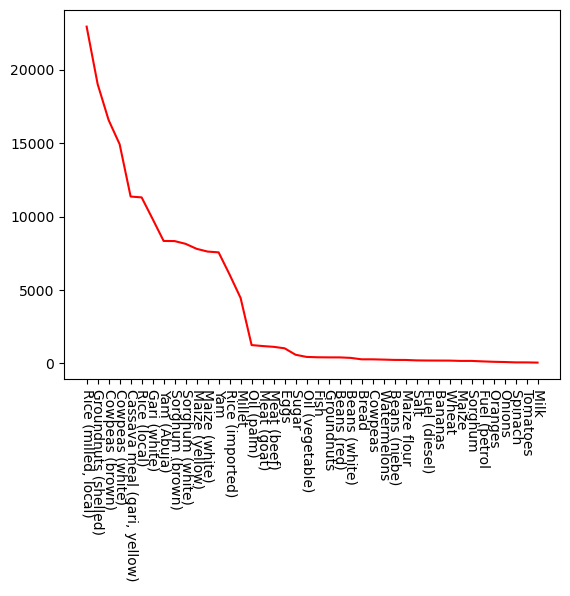

In [183]:
line_data1=food.groupby('Country_name').get_group('Nigeria')[['Commodity_purchased','Price']].groupby('Commodity_purchased')
fig,ax1=plt.subplots()
ax1.plot(line_data1.mean().sort_values(by='Price',ascending=False),color='r')
plt.xticks(rotation=270)

plt.show()

<AxesSubplot:xlabel='Commodity_purchased'>

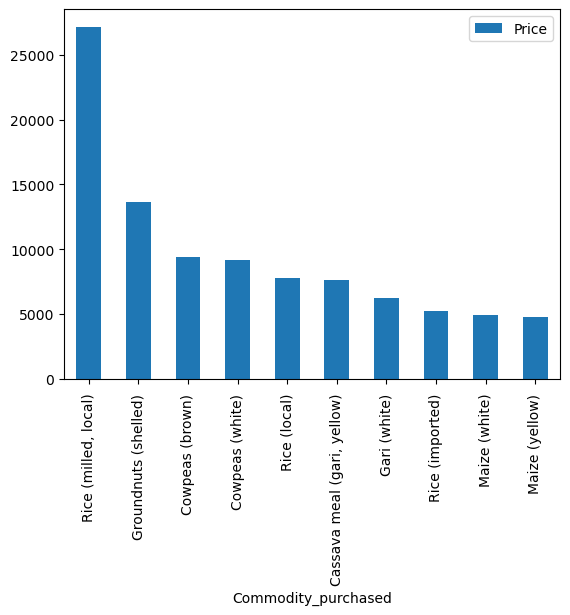

In [68]:
line_data1=food.groupby(['Country_name','Year']).get_group(('Nigeria',2019))[['Commodity_purchased','Price']].groupby('Commodity_purchased').mean().sort_values(by='Price',ascending=False).head(10)
line_data1.plot(kind='bar')

array([<AxesSubplot:ylabel='Price'>], dtype=object)

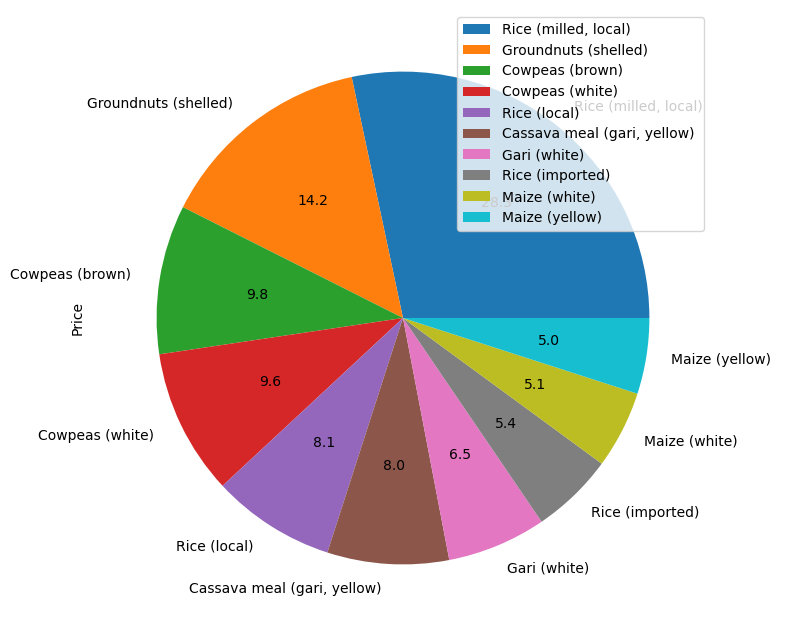

In [162]:
line_data1=food.groupby(['Country_name','Year']).get_group(('Nigeria',2019))[['Commodity_purchased','Price']].groupby('Commodity_purchased').mean().sort_values(by='Price',ascending=False).head(10)
line_data1.plot(kind='pie',subplots=True,figsize=(14,8),autopct='%.1f')

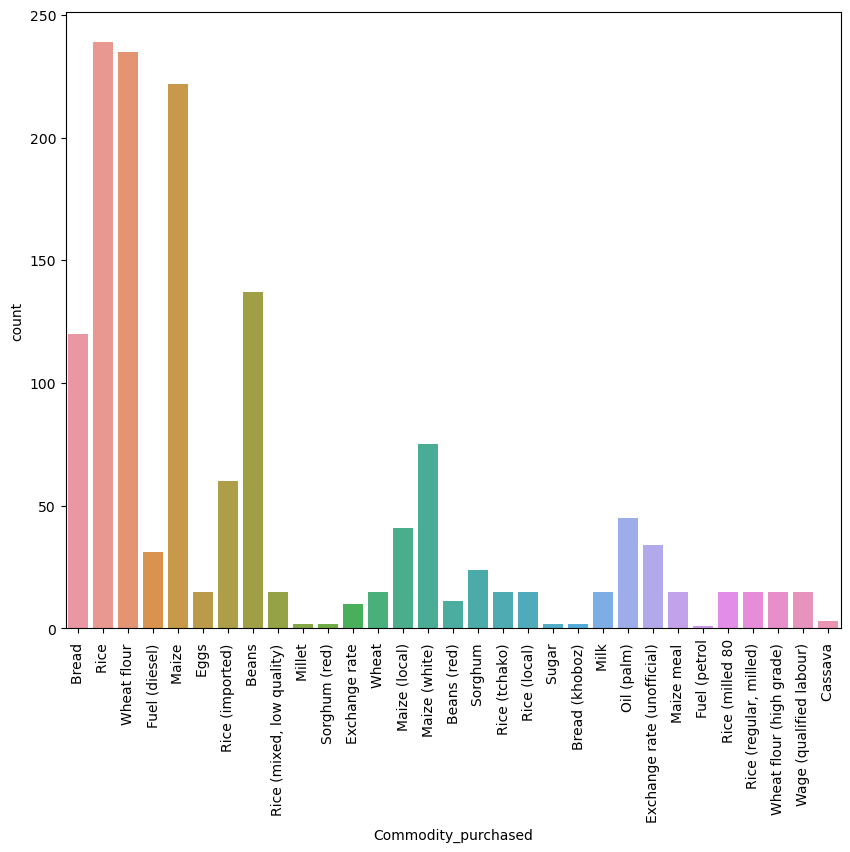

In [185]:
plt.figure(figsize=(10,8))
sns.countplot(x=food.groupby('Country_name')['Commodity_purchased'].head(15))
plt.xticks(rotation=90)
plt.show()

   ###                 HOW I CREATED MY PROJECT

#### 1. I imported the various modules needed to the environment
#### 2.I downloaded the dataset and read it in the Jupyter environment
#### 3. I cleaned the jumbed dataset by removing the last column which contained empty values and was not needed for my project
#### 4. I proceeded to rename all column headers to make it understandable and legible
#### 5. I replaced a column,'Locality_name', where some names were empty with none so as not to generate a distorted analysis
#### 6. I checked for duplicates and any null values of which eveything came back as 'false'
#### 7. I tried my hands on some visualization 
#### a. line chart to get the count of goods purchased in each country using Afghanistan as the study
#### b. pie chart to visualize Countries with the highest Commodity Purchase
#### c. bar chart to display Count of each Commodity in Top 20 Countries
#### d.bar chart to display Sum of Top 20 most purchased Commodities in all Countries 
#### e. pie chart to display Percentage of Top 20 Commodities in all Countries
#### f. bar chart to display Total Commodity Purchased in each country 
#### g. line chart to display all commodities purchased in each country using 'Nigeria' as a study
#### h. bar chart for commodities purchased in a particular year in each country using 'Nigeria' as a study 
#### i. seaborn chart to display the sum of amount of times commodities were purchased in all countries 
#### j. i also created a streamlit app to show some analysis